In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
val_df = pd.read_csv('../data/validation_predictions.csv')

In [ ]:
# Ensure age is treated as a numerical feature
val_df['age'] = val_df['age'].astype(float)

# Group by age and gender and calculate the mean predicted probability for each group
age_gender_grouped = val_df.groupby(['age', 'gender'])['Predicted'].mean().reset_index()

# Calculate the overall mean predicted probability for statistical parity
overall_mean_pred = val_df['Predicted'].mean()

In [ ]:

traces = []

# trace for females
traces.append(go.Scatter(
    x=age_gender_grouped[age_gender_grouped['gender'] == 0]['age'],
    y=age_gender_grouped[age_gender_grouped['gender'] == 0]['Predicted'] - overall_mean_pred,
    mode='lines+markers',
    name='Female',
    marker=dict(color='LightPink', size=10, line=dict(width=2)),
    line=dict(color='HotPink', width=2)
))

# trace for males
traces.append(go.Scatter(
    x=age_gender_grouped[age_gender_grouped['gender'] == 1]['age'],
    y=age_gender_grouped[age_gender_grouped['gender'] == 1]['Predicted'] - overall_mean_pred,
    mode='lines+markers',
    name='Male',
    marker=dict(color='LightSkyBlue', size=10, line=dict(width=2)),
    line=dict(color='DodgerBlue', width=2)
))

# trace for statistical parity line
traces.append(go.Scatter(
    x=age_gender_grouped['age'],
    y=[0]*len(age_gender_grouped['age']),
    mode='lines',
    name='Statistical Parity',
    line=dict(color='Gray', width=2, dash='dash')
))

# layout
layout = go.Layout(
    title='Fairness Partial Dependence Plot (FPDP) with Statistical Parity for Age',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Deviation from Overall Mean Probability of ASD'),
    margin=dict(l=40, r=40, t=40, b=40)
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


/Users/steve/miniconda3/lib/python3.9/site-packages/xgboost/data.py:463: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
/Users/steve/miniconda3/lib/python3.9/site-packages/xgboost/data.py:464: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)
/Users/steve/miniconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/steve/miniconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtyp

ValueError: feature_names mismatch: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'jaundice', 'autism', 'used_app_before', 'result', 'age_desc', 'country_of_res=Afghanistan', 'country_of_res=AmericanSamoa', 'country_of_res=Angola', 'country_of_res=Argentina', 'country_of_res=Armenia', 'country_of_res=Aruba', 'country_of_res=Australia', 'country_of_res=Austria', 'country_of_res=Azerbaijan', 'country_of_res=Bahamas', 'country_of_res=Bangladesh', 'country_of_res=Belgium', 'country_of_res=Bolivia', 'country_of_res=Brazil', 'country_of_res=Burundi', 'country_of_res=Canada', 'country_of_res=China', 'country_of_res=Cyprus', 'country_of_res=Czech Republic', 'country_of_res=Egypt', 'country_of_res=Ethiopia', 'country_of_res=France', 'country_of_res=Germany', 'country_of_res=Hong Kong', 'country_of_res=Iceland', 'country_of_res=India', 'country_of_res=Iran', 'country_of_res=Iraq', 'country_of_res=Ireland', 'country_of_res=Italy', 'country_of_res=Japan', 'country_of_res=Jordan', 'country_of_res=Kazakhstan', 'country_of_res=Malaysia', 'country_of_res=Mexico', 'country_of_res=Netherlands', 'country_of_res=New Zealand', 'country_of_res=Nicaragua', 'country_of_res=Niger', 'country_of_res=Oman', 'country_of_res=Pakistan', 'country_of_res=Romania', 'country_of_res=Russia', 'country_of_res=Saudi Arabia', 'country_of_res=Serbia', 'country_of_res=Sierra Leone', 'country_of_res=South Africa', 'country_of_res=Spain', 'country_of_res=Sri Lanka', 'country_of_res=Sweden', 'country_of_res=Tonga', 'country_of_res=Ukraine', 'country_of_res=United Arab Emirates', 'country_of_res=United Kingdom', 'country_of_res=United States', 'country_of_res=Viet Nam', 'ethnicity=?', 'ethnicity=Asian', 'ethnicity=Black', 'ethnicity=Hispanic', 'ethnicity=Latino', 'ethnicity=Middle Eastern ', 'ethnicity=Others', 'ethnicity=Pasifika', 'ethnicity=South Asian', 'ethnicity=Turkish', 'ethnicity=White-European', 'ethnicity=others', 'relation=?', 'relation=Health care professional', 'relation=Others', 'relation=Parent', 'relation=Relative', 'relation=Self'] ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']
expected ethnicity=South Asian, country_of_res=Italy, relation=Relative, country_of_res=Niger, country_of_res=Egypt, country_of_res=Iran, country_of_res=Japan, country_of_res=Sri Lanka, country_of_res=Oman, country_of_res=Brazil, country_of_res=India, country_of_res=Netherlands, country_of_res=AmericanSamoa, ethnicity=?, country_of_res=Azerbaijan, country_of_res=Serbia, country_of_res=United Arab Emirates, country_of_res=Bangladesh, relation=Others, country_of_res=Aruba, country_of_res=Germany, country_of_res=Spain, country_of_res=France, country_of_res=Romania, autism, ethnicity=White-European, country_of_res=Saudi Arabia, ethnicity=Asian, relation=Health care professional, country_of_res=Mexico, ethnicity=Turkish, country_of_res=Burundi, country_of_res=New Zealand, relation=Self, relation=?, country_of_res=Ukraine, ethnicity=Pasifika, country_of_res=Viet Nam, country_of_res=Malaysia, country_of_res=Nicaragua, country_of_res=Russia, relation=Parent, ethnicity=Latino, country_of_res=Bahamas, country_of_res=Cyprus, country_of_res=Kazakhstan, country_of_res=Ireland, ethnicity=Others, country_of_res=Ethiopia, country_of_res=Sweden, country_of_res=Canada, country_of_res=Iraq, ethnicity=Hispanic, country_of_res=United Kingdom, ethnicity=Black, country_of_res=Angola, country_of_res=Afghanistan, country_of_res=Tonga, country_of_res=Iceland, country_of_res=Sierra Leone, country_of_res=Hong Kong, country_of_res=Australia, country_of_res=Bolivia, country_of_res=Pakistan, country_of_res=Belgium, ethnicity=Middle Eastern , country_of_res=China, country_of_res=United States, country_of_res=Jordan, country_of_res=South Africa, ethnicity=others, country_of_res=Austria, country_of_res=Czech Republic, country_of_res=Argentina, country_of_res=Armenia in input data
training data did not have the following fields: contry_of_res, relation, ID, ethnicity, Class/ASD, austim

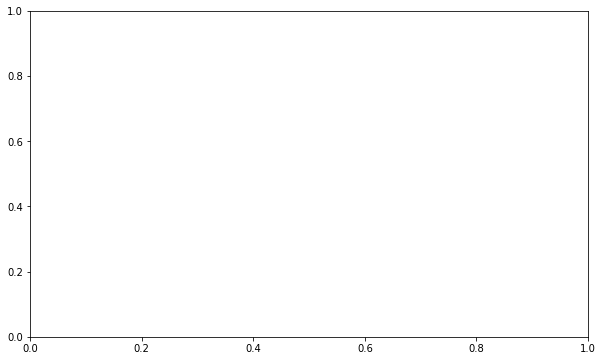

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import xgboost as xgb
import pickle

# Load your dataset
df = pd.read_csv('../data/train.csv')

categorical_features = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']
for feature in categorical_features:
    df[feature] = df[feature].astype('category')

# Load your trained XGBoost model
with open('../models/xgb.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

feature_name = 'age'


# Check if the feature is numeric before proceeding
if df[feature_name].dtype.kind in 'if':  # 'i' for integer, 'f' for float
    # Create the grid of values for the feature
    feature_values = np.linspace(df[feature_name].min(), df[feature_name].max(), 50)

    # Generate the partial dependence plot data
    fig, ax = plt.subplots(figsize=(10, 6))
    display = PartialDependenceDisplay.from_estimator(
        xgb_model,
        X=df,
        features=[feature_name],
        kind='average',  # or 'both' to include individual predictions
        grid_resolution=50,  # Adjust the resolution for curve smoothness
        feature_names=df.columns,
        ax=ax
    )

    # Customize the plot with title, labels, etc.
    ax.set_title(f'Partial Dependence Plot for {feature_name}')
    ax.set_xlabel(f'{feature_name}')
    ax.set_ylabel('Average prediction')
    plt.show()
else:
    print(f'The feature "{feature_name}" is not numeric and cannot be used for PDP as is.')
